# MODIS + XEE

In [2]:
import ee
import xee
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
sns.set_context(context="talk", font_scale=0.7)

In [3]:
ee.Initialize(opt_url='https://earthengine-highvolume.googleapis.com')

* MODIS NADIR BRDF-Adjusted Reflectance Daily - [GEE Catalogue](https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MCD43A4)
* MODIS Terra Surface Reflanctance Daily Global 250m [GEE Catalogue](https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD09GQ)
* **MODIS Terra Surface Reflectance Daily Global 1km and 500km** - [GEE Catalogue](https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD09GA)
   * `MODIS/061/MOD09GA`

In [4]:
# image collection
image_collection = "MODIS/061/MOD09GA"
collection = ee.ImageCollection(image_collection)

# choose the date
start_date = "2018-10-01"
end_date = "2018-11-01"
collection = collection.filterDate(start_date, end_date)


# # select bands
# variables = [f"sur_refl_b0{i}" for i in range(1,7+1)]
# collection = collection.select(selectors=variables)

In [24]:
# Spatial Resolution in CRS Units [m]
scale = 0.001

# The coordinate reference system to use (NAD83 Albers CONUS)
crs = "EPSG:4326"

# region
countries = ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level0")
spain = countries.filterMetadata("ADM0_NAME", "equals", "Spain")
region = spain.geometry().bounds()

### Load Data Into Xarray

In [25]:
ds = xr.open_dataset(
    collection,
    engine='ee',
    scale=scale,
    projection=crs,
    geometry=region,
)

In [26]:
ds

<xarray.Dataset>
Dimensions:                (time: 31, lon: 22487, lat: 16154)
Coordinates:
  * time                   (time) datetime64[ns] 2018-10-01 ... 2018-10-31
  * lon                    (lon) float32 -18.17 -18.17 -18.17 ... 4.315 4.316
  * lat                    (lat) float32 43.79 43.79 43.79 ... 27.64 27.64 27.64
Data variables: (12/22)
    num_observations_1km   (time, lon, lat) int32 ...
    state_1km              (time, lon, lat) int32 ...
    SensorZenith           (time, lon, lat) int32 ...
    SensorAzimuth          (time, lon, lat) int32 ...
    Range                  (time, lon, lat) int32 ...
    SolarZenith            (time, lon, lat) int32 ...
    ...                     ...
    sur_refl_b06           (time, lon, lat) int32 ...
    sur_refl_b07           (time, lon, lat) int32 ...
    QC_500m                (time, lon, lat) int32 ...
    obscov_500m            (time, lon, lat) int32 ...
    iobs_res               (time, lon, lat) int32 ...
    q_scan                 (time, lon, lat) int32 ...
Attributes:
    crs:      EPSG:4326

* B12 - 250m
* B3-7 - 500m
* B8+ - 1km

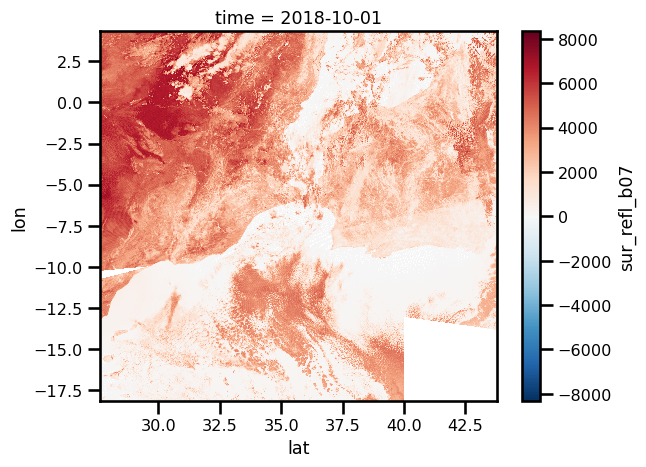

In [17]:
fig, ax = plt.subplots()

ds["sur_refl_b07"].isel(time=0).plot(ax=ax)

plt.show()